# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


/var/folders/z9/1gsgf3hd1gncc0f_n1pdkbmw0000gn/T/ipykernel_73748/1896563817.py:12: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')



Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1896
           1       0.97      0.97      0.97      1112

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008

Confusion Matrix:
[[1867   29]
 [  36 1076]]

Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1896
           1       0.97      0.97      0.97      1112

    accuracy                           0.98      3008
   macro avg       0.98      0.98      0.98      3008
weighted avg       0.98      0.98      0.98      3008

Confusion Matrix:
[[1860   36]
 [  33 1079]]

Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1896
           1       0.99    

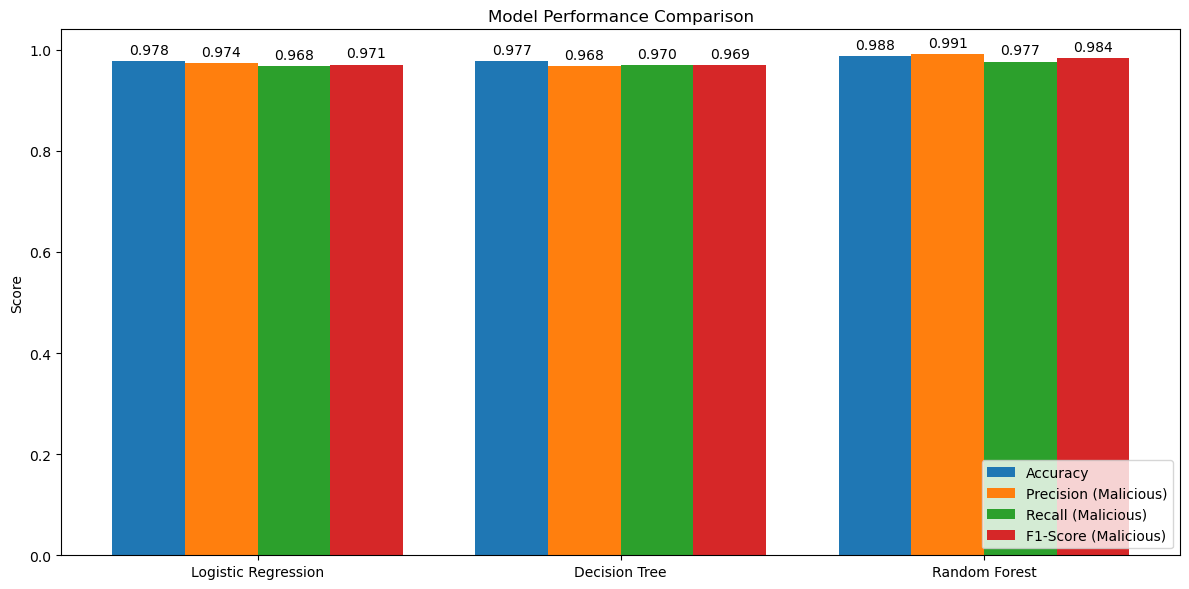

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('drebin-215-dataset-5560malware-9476-benign.csv')

# Convert class labels: 'S' -> 1 (malicious), 'B' -> 0 (benign)
df['class'] = df['class'].map({'S': 1, 'B': 0})

# Drop missing values
df = df.dropna()

# Separate features and target
X = df.drop(columns='class')
y = df['class']

# Convert to numeric, fill non-convertible with 0
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        "report": report,
        "confusion_matrix": cm
    }
    print(f"\n{name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(cm)

# Plot comparison bar chart for Accuracy, Precision, Recall, F1 (Malicious class)
model_names = list(results.keys())
accuracies = [results[name]['report']['accuracy'] for name in model_names]
precisions = [results[name]['report']['1']['precision'] for name in model_names]
recalls = [results[name]['report']['1']['recall'] for name in model_names]
f1_scores = [results[name]['report']['1']['f1-score'] for name in model_names]

x = np.arange(len(model_names))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
bars2 = ax.bar(x - 0.5*width, precisions, width, label='Precision (Malicious)')
bars3 = ax.bar(x + 0.5*width, recalls, width, label='Recall (Malicious)')
bars4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-Score (Malicious)')

ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend(loc='lower right')

# Add value labels
for bar in bars1 + bars2 + bars3 + bars4:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.